### Confound modeling

using results generated from normalize_raw_bold.sh

In [46]:
import nibabel as nib
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [47]:
basedir = Path('/Users/poldrack/data_unsynced/ds000105')
origfile = basedir / 'derivatives/confound_example/sub-1_task-objectviewing_run-01_space-MNI152NLin2009cAsym_res-2_bold.nii.gz'
origimg = nib.load(str(origfile))

preprocfile = basedir / 'derivatives/fmriprep/sub-1/func/sub-1_task-objectviewing_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz'
preprocimg = nib.load(str(preprocfile))

cleanedfile = basedir / 'derivatives/fmriprep/sub-1/func/sub-1_task-objectviewing_run-1_space-MNI152NLin2009cAsym_res-2_desc-cleaned_bold.nii.gz'
cleanedimg = nib.load(str(cleanedfile))



In [48]:
voxel = (61, 48,  34)

origdata = origimg.get_fdata()
preprocdata = preprocimg.get_fdata()
cleaneddata = cleanedimg.get_fdata()

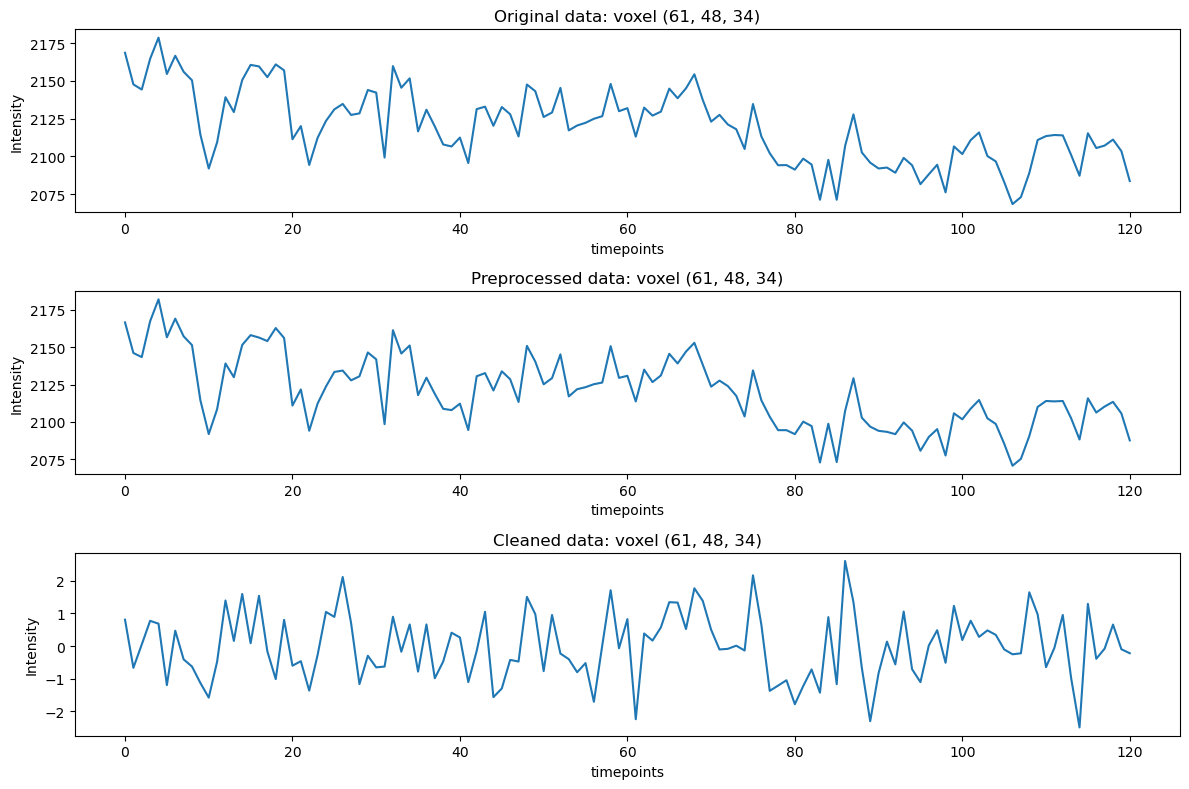

In [62]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(origdata[*voxel, :])
plt.xlabel('timepoints')
plt.ylabel('Intensity')
plt.title(f'Original data: voxel {voxel}')

plt.subplot(3, 1, 2)

plt.plot(preprocdata[*voxel, :])
plt.xlabel('timepoints')
plt.ylabel('Intensity')
plt.title(f'Preprocessed data: voxel {voxel}')

plt.subplot(3, 1, 3)

plt.plot(cleaneddata[*voxel, :])
plt.xlabel('timepoints')
plt.ylabel('Intensity')
plt.title(f'Cleaned data: voxel {voxel}')

plt.tight_layout()

In [52]:
confound_file = basedir / 'derivatives/fmriprep/sub-1/func/sub-1_task-objectviewing_run-1_desc-confounds_timeseries.tsv'
confound_data = pd.read_csv(confound_file, sep='\t')
list(confound_data.columns)

['global_signal',
 'global_signal_derivative1',
 'global_signal_power2',
 'global_signal_derivative1_power2',
 'csf',
 'csf_derivative1',
 'csf_power2',
 'csf_derivative1_power2',
 'white_matter',
 'white_matter_derivative1',
 'white_matter_derivative1_power2',
 'white_matter_power2',
 'csf_wm',
 'tcompcor',
 'std_dvars',
 'dvars',
 'framewise_displacement',
 'rmsd',
 't_comp_cor_00',
 't_comp_cor_01',
 't_comp_cor_02',
 'c_comp_cor_00',
 'c_comp_cor_01',
 'c_comp_cor_02',
 'c_comp_cor_03',
 'c_comp_cor_04',
 'c_comp_cor_05',
 'c_comp_cor_06',
 'c_comp_cor_07',
 'c_comp_cor_08',
 'w_comp_cor_00',
 'w_comp_cor_01',
 'w_comp_cor_02',
 'w_comp_cor_03',
 'w_comp_cor_04',
 'w_comp_cor_05',
 'w_comp_cor_06',
 'w_comp_cor_07',
 'w_comp_cor_08',
 'w_comp_cor_09',
 'w_comp_cor_10',
 'w_comp_cor_11',
 'w_comp_cor_12',
 'w_comp_cor_13',
 'w_comp_cor_14',
 'w_comp_cor_15',
 'w_comp_cor_16',
 'w_comp_cor_17',
 'a_comp_cor_00',
 'a_comp_cor_01',
 'a_comp_cor_02',
 'a_comp_cor_03',
 'a_comp_cor_04',


Text(0.5, 1.0, 'Framewise Displacement and Global Signal Over Time')

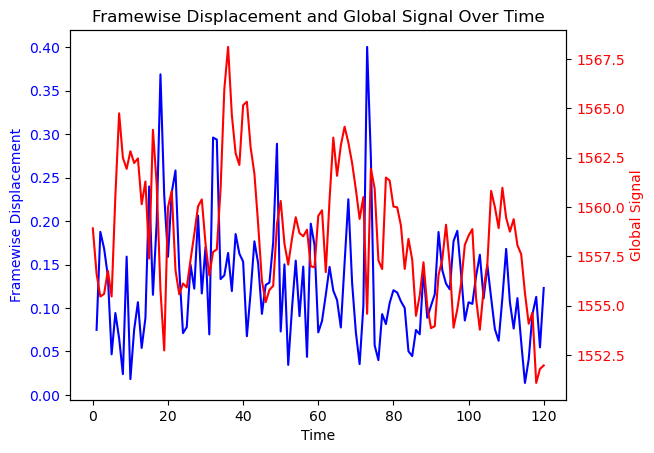

In [53]:
fig, ax1 = plt.subplots()

# Plot framewise displacement on the primary y-axis
ax1.plot(confound_data['framewise_displacement'], color='b')
ax1.set_xlabel('Time')
ax1.set_ylabel('Framewise Displacement', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(confound_data['global_signal'], color='r')
ax2.set_ylabel('Global Signal', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Framewise Displacement and Global Signal Over Time')


In [54]:
list(confound_data.columns)

['global_signal',
 'global_signal_derivative1',
 'global_signal_power2',
 'global_signal_derivative1_power2',
 'csf',
 'csf_derivative1',
 'csf_power2',
 'csf_derivative1_power2',
 'white_matter',
 'white_matter_derivative1',
 'white_matter_derivative1_power2',
 'white_matter_power2',
 'csf_wm',
 'tcompcor',
 'std_dvars',
 'dvars',
 'framewise_displacement',
 'rmsd',
 't_comp_cor_00',
 't_comp_cor_01',
 't_comp_cor_02',
 'c_comp_cor_00',
 'c_comp_cor_01',
 'c_comp_cor_02',
 'c_comp_cor_03',
 'c_comp_cor_04',
 'c_comp_cor_05',
 'c_comp_cor_06',
 'c_comp_cor_07',
 'c_comp_cor_08',
 'w_comp_cor_00',
 'w_comp_cor_01',
 'w_comp_cor_02',
 'w_comp_cor_03',
 'w_comp_cor_04',
 'w_comp_cor_05',
 'w_comp_cor_06',
 'w_comp_cor_07',
 'w_comp_cor_08',
 'w_comp_cor_09',
 'w_comp_cor_10',
 'w_comp_cor_11',
 'w_comp_cor_12',
 'w_comp_cor_13',
 'w_comp_cor_14',
 'w_comp_cor_15',
 'w_comp_cor_16',
 'w_comp_cor_17',
 'a_comp_cor_00',
 'a_comp_cor_01',
 'a_comp_cor_02',
 'a_comp_cor_03',
 'a_comp_cor_04',


In [55]:
# select confounds of interest

confound_prefixes = ['trans_', 'rot_', 'a_comp_cor_', 'cosine']
confound_cols = [c for c in list(confound_data.columns) if any([c.startswith(p) for p in confound_prefixes])]
confounds_selected = confound_data[confound_cols]
confounds_selected = confounds_selected.bfill()
confounds_selected.columns

Index(['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03',
       'a_comp_cor_04', 'a_comp_cor_05', 'a_comp_cor_06', 'a_comp_cor_07',
       'a_comp_cor_08', 'a_comp_cor_09', 'a_comp_cor_10', 'a_comp_cor_11',
       'a_comp_cor_12', 'a_comp_cor_13', 'a_comp_cor_14', 'a_comp_cor_15',
       'a_comp_cor_16', 'a_comp_cor_17', 'a_comp_cor_18', 'cosine00',
       'cosine01', 'cosine02', 'trans_x', 'trans_x_derivative1',
       'trans_x_derivative1_power2', 'trans_x_power2', 'trans_y',
       'trans_y_derivative1', 'trans_y_derivative1_power2', 'trans_y_power2',
       'trans_z', 'trans_z_derivative1', 'trans_z_power2',
       'trans_z_derivative1_power2', 'rot_x', 'rot_x_derivative1',
       'rot_x_power2', 'rot_x_derivative1_power2', 'rot_y',
       'rot_y_derivative1', 'rot_y_power2', 'rot_y_derivative1_power2',
       'rot_z', 'rot_z_derivative1', 'rot_z_power2',
       'rot_z_derivative1_power2'],
      dtype='object')

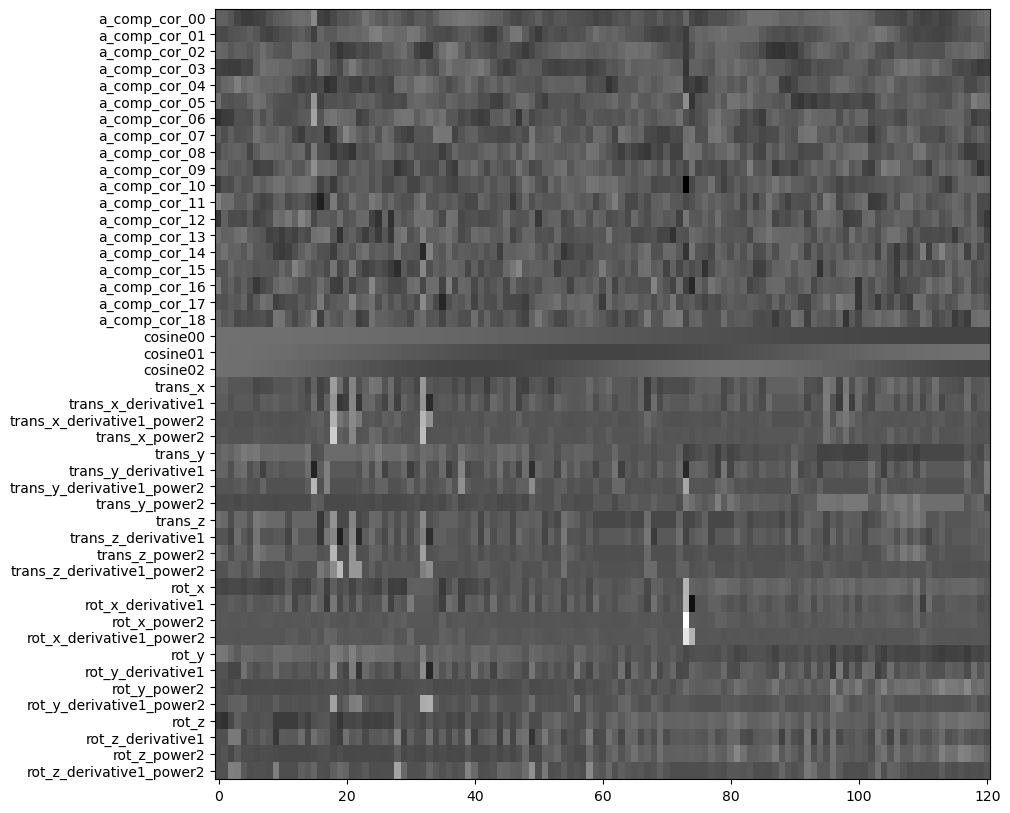

In [56]:
# create map showing variance explained by confounds at each voxel



# scale for better visualization
confounds_scaled = (confounds_selected - confounds_selected.mean()) / confounds_selected.std()

plt.figure(figsize=(10, 10))
plt.imshow(confounds_scaled.T, cmap='gray', aspect='auto')
y_labels = list(confounds_scaled.columns)
_ = plt.yticks(ticks=np.arange(len(y_labels)), labels=y_labels)
